标记器(Tokenizer)是 NLP 管道的核心组件之一。它们有一个目的：将文本转换为模型可以处理的数据。模型只能处理数字，因此标记器(Tokenizer)需要将我们的文本输入转换为数字数据。
<br/>
子词分词算法依赖于这样一个原则，即不应将常用词拆分为更小的子词，而应将稀有词分解为有意义的子词。
<br/>
这是一个示例，展示了子词标记化算法如何标记序列“Let’s do tokenization!”：
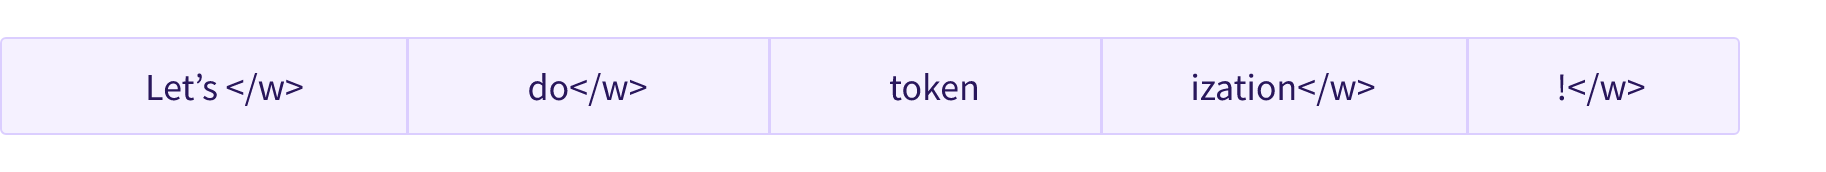
这些子词最终提供了很多语义含义：例如，在上面的示例中，“tokenization”被拆分为“token”和“ization”，这两个具有语义意义同时节省空间的词符(token)（只需要两个标记(token)代表一个长词）。

#### 加载和保存
加载和保存标记器(tokenizer)就像使用模型一样简单。实际上，它基于相同的两种方法： from_pretrained() 和 save_pretrained() 。

In [1]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


现在可以使用标记器(tokenizer)

In [2]:
sequence = "Using a Transformer network is simple"
tokens = tokenizer(sequence)
print(tokens)

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


对于多句：

In [6]:
text = "Tokenizing text is a core task of NLP."
tokens = tokenizer(text,sequence)
print(tokens)

{'input_ids': [101, 1706, 6378, 4404, 3087, 1110, 170, 4160, 4579, 1104, 21239, 2101, 119, 102, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


#### 标记化
这个标记器(tokenizer)是一个子词标记器(tokenizer)：它对词进行拆分，直到获得可以用其词汇表表示的标记(token)。transformer 就是这种情况，它分为两个标记：transform 和 ##er。

In [7]:
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


#### 从词符(token)到输入 ID
注意：这些id只是子词标记的id，不带模型处理需要的其它标记，如果直接把这组id传给模型会出错。

In [8]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


#### 编码

In [5]:
encode_string = tokenizer.encode(sequence)
print(encode_string)

[101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102]


#### 解码

In [6]:
decoded_string = tokenizer.decode([101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102])
print(decoded_string)

[CLS] Using a Transformer network is simple [SEP]


下面是模型计算需要的id，可以看到在数组两头增加了特定数字

In [19]:
tokenized_inputs = tokenizer(sequence)
print(tokenized_inputs.input_ids)

[101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102]


可以将这些数字转为子词，看一下是什么：

In [17]:
tokenized_inputs = tokenizer(sequence)
tokens = tokenizer.convert_ids_to_tokens(tokenized_inputs.input_ids) 
print(tokens)

['[CLS]', 'Using', 'a', 'Trans', '##former', 'network', 'is', 'simple', '[SEP]']


In [20]:
print(tokenizer.convert_tokens_to_string(tokens)) 

[CLS] Using a Transformer network is simple [SEP]


检查词汇量的大小

In [21]:
tokenizer.vocab_size

28996

相应模型的最大上下文大小

In [22]:
tokenizer.model_max_length

512

模型在其前向传递中期望的字段的名称

In [23]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']